In [1]:
import torch
import framework
import math
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%config InlineBackend.print_figure_kwargs={'facecolor' : '#00000000'}

In [2]:
def generate_disc_set(nb):
    # generate unif samples
    p = torch.FloatTensor(nb, 2).uniform_(0, 1)
    # assign label inside/outside circle
    center = torch.tensor([0.5,0.5]).float()
    inside = ( torch.norm(p-center, dim=1) < (1.0 / math.sqrt(2*math.pi)) )
    # Hot encoding
    label = torch.zeros(inside.shape[0], 2)
    label[inside,1] = 1
    label[-(inside-1),0] = 1
    return p, label

In [3]:
N = 1000
x_train, y_train = generate_disc_set(N)
x_test, y_test = generate_disc_set(N)

<Figure size 400x400 with 0 Axes>

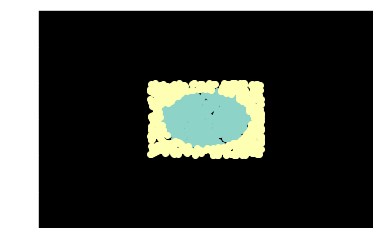

<Figure size 400x400 with 0 Axes>

In [4]:
plt.axis([-1,2,-1,2])
plt.scatter(x_train[y_train[:,1] ==1][:,0], x_train[y_train[:,1] ==1][:,1])
plt.scatter(x_train[y_train[:,0] ==1][:,0], x_train[y_train[:,0] ==1][:,1])
plt.figure(figsize=(5,5), dpi=80)

In [5]:
H = 25 # hidden layer size
hidden_nb = 3 # hidden layer amount
modules_array = []

# Input layer
modules_array.append(framework.Linear(2, H, 'relu'))
# Hidden layers
for i in range(0, hidden_nb):
    modules_array.append(framework.ReLU())
    modules_array.append(framework.Linear(H, H, 'relu'))
# Output layer
modules_array.append(framework.ReLU())
modules_array.append(framework.Linear(H, 2, 'none'))

model = framework.Sequential(modules_array)

In [6]:
def train(model, x_train, y_train) :
    mini_batch_size = 100
    epochs = 10
    lr = 1e-1
    train_error_hist = []
    test_error_hist = []
    optimizer = framework.SGD(model.param(), lr)
    for e in range(0, epochs):
         for b in range(0, x_train.size(0), mini_batch_size):
                # Forward pass of neural net
                x_batch = x_train.narrow(0, b, mini_batch_size)
                y_batch = y_train.narrow(0, b, mini_batch_size)
                output = model.forward(x_batch)
                # Compute loss
                loss_module = framework.LossMSE(y_batch)
                loss = loss_module.forward(output)
                print(loss.item())
                # Set all gradients to zero
                optimizer.zero_grad()
                # Backward
                model.backward(loss_module.backward())
                # Step
                optimizer.step()

In [7]:
loss_hist = train(model, x_train, y_train)

0.6223676800727844
0.7174223065376282
0.6906213164329529
0.6208412051200867
0.6630946397781372
0.6884533762931824
0.710703432559967
0.6138870716094971
0.7324012517929077
0.6139032244682312
0.5996282696723938
0.6784780621528625
0.6574439406394958
0.598341703414917
0.6357068419456482
0.6621880531311035
0.6750043630599976
0.6027861833572388
0.6968399882316589
0.6013534665107727
0.5866118669509888
0.6530011892318726
0.6366734504699707
0.5851330757141113
0.6180174350738525
0.6442683935165405
0.6514675617218018
0.5956509113311768
0.6717309355735779
0.5929725170135498
0.5783730745315552
0.6350427865982056
0.6224223375320435
0.5767449140548706
0.6056733131408691
0.631113588809967
0.6351149082183838
0.5906297564506531
0.6531631350517273
0.586931586265564
0.5729579329490662
0.621782124042511
0.612247109413147
0.5710421204566956
0.5967158675193787
0.6210451126098633
0.6232712864875793
0.5866407155990601
0.6390132308006287
0.5822588205337524
0.569132387638092
0.6114161014556885
0.6044905781745911
